_In this notebook, every question will be marked by a blue border, and answers should be provided in cells in a green border. All code-related answers are preceded by a #TODO._

## Students (to fill in)

 - Imad Boukezzata (B2)
 - Hazem Mejri (B2)

# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [2]:
# Importing the dataset
import numpy as np
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [3]:
# Preprocessing: scale input data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [4]:
# Split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [5]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

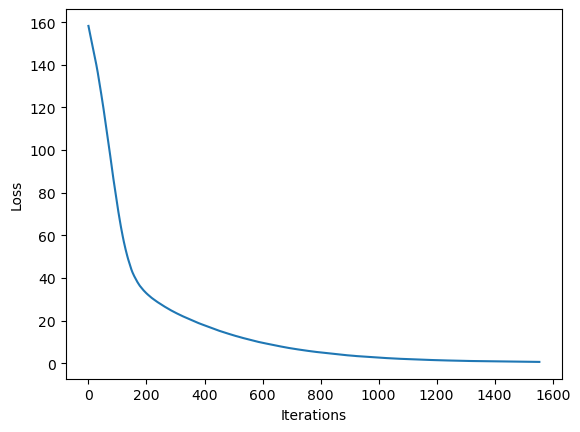

In [6]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

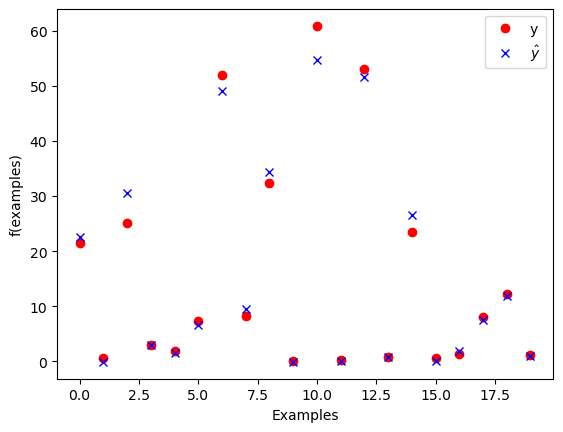

In [8]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?
</div>
<!-- Question End -->

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**


1) Structure definie par les paramétres passés dans la fonction MLPRegressor :
Contient 3000 iterations et initialise des poids à 1 

2) Backpropagation

3) Ca depend du nombre des iterations : termine aprés 3000 itérations




</div>
<!-- Answer Section End -->

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [9]:
# clean all previously defined variables for the sailing boats
%reset -f

In [10]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
from sklearn.utils import shuffle
import pandas as pd

cal_housing = fetch_california_housing()
print(f"dataset type : {type(cal_housing)}")
print(f"number of data : {len(cal_housing.data)}")
X_all = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y_all = pd.DataFrame(cal_housing.target,columns=["target"])

X_all, y_all = shuffle(X_all, y_all, random_state=1)

display(X_all.head(10)) # print the first 10 values
display(y_all.head(10))

y_all = y_all['target']  # transform from dataframe into a single vector as expected by most API in sklearn

dataset type : <class 'sklearn.utils._bunch.Bunch'>
number of data : 20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13
6636,7.3715,17.0,5.006098,0.993902,229.0,1.396341,34.15,-118.16
17333,5.2990,12.0,7.214932,1.047511,1200.0,2.714932,34.91,-120.44
19081,2.3276,29.0,4.731076,1.115538,1124.0,2.239044,38.31,-122.48
13298,3.4950,35.0,4.956522,0.952569,729.0,2.881423,34.08,-117.64
7157,3.1895,45.0,5.533333,1.166667,302.0,5.033333,34.04,-118.16


,target
4712,3.550
2151,0.707
15927,2.294
82,1.125
8161,2.254
6636,2.630
17333,2.268
19081,1.662
13298,1.180
7157,1.563


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Data Preparation

The dataset consists of 20,000 datas. We first extract the last 5,000 for test samples, which we will use later.

For training and validation, we will use a subset consisting of only 2,000 datas to speed up computations.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Split those 2000 remaining dataset between a training set and a validation set (see usage of `train_test_split` function earlier)
- Why did you choose this partition?
- What is the purpose of each subset (train, validation, test) ?

</div>
<!-- Question End -->


Please use the conventional names `X_train`, `X_val`, `y_train` and `y_val`.

In [11]:
# use the last N samples for test (for later use)
num_test_samples = 5000
X_test, y_test = X_all[-num_test_samples:], y_all[-num_test_samples:]

# only use the first N samples to limit training time
num_samples = 2000
X, y = X_all[:num_samples], y_all[:num_samples]

In [12]:
# TODO 
# TODO 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size = 0.25)

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

2) on a besoin de 5000 test samples sur 20 000 data donc 25% est consacré aux tests.


3) 
    
    Train : Ce sous-ensemble est utilisé pour entraîner le modèle d'apprentissage automatique : ca sert à apprendre les données d'entrées et de sorties.
 
   Validation : Ce sous-ensemble est utilisé pour évaluer la performance du modéle , il aide à optimiser la performance et à ajuster les paramétres.
   
   Test : Ce sous-ensemble sert à évaluer la performance finale du modéle: ce sont des jeux de donnée qui permettent d'évaluer la capacité du modèle à généraliser à de nouvelles données non vues.
   






</div>
<!-- Answer Section End -->

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Using the `StandardScaler`, first fit this scaler on your training dataset (`X_train`), then use this fitted scaler to transform the training dataset, the validation dataset (`X_val`), and the test dataset (`X_test`).


- Why is it important to fit the scaler only on the training data and not on the entire dataset or separately on each dataset?

</div>
<!-- Question End -->

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [13]:
# TODO
# TODO
from sklearn.preprocessing import StandardScaler 

ss= StandardScaler()
print ("X_train sans SS " , x_train)
ss.fit_transform(x_train)
print ("X_train apres SS " , x_train)


print ("X_test sans SS " , x_test)
ss.fit_transform(x_test)
print ("X_test apres SS " , x_test)




X_train sans SS         MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
4424   1.5491      20.0   1.640000   0.680000        87.0  3.480000     34.06   
5439   6.0804      42.0   5.244275   1.007634       907.0  2.307888     34.01   
11659  4.1591      10.0   5.623377   1.288600      1992.0  2.874459     33.82   
12274  3.1393      14.0   6.310795   1.155397      1947.0  2.309609     33.97   
15687  3.8068      52.0   4.184272   1.046948      1377.0  1.616197     37.79   
...       ...       ...        ...        ...         ...       ...       ...   
7380   2.5833      37.0   3.606164   0.900685      1354.0  4.636986     33.97   
19680  1.8849      27.0   4.935644   1.051155      1419.0  2.341584     39.15   
6840   2.0250      43.0   4.303279   1.032787       820.0  3.360656     34.07   
20092  3.1076      17.0  11.428005   2.085865      2071.0  2.735799     38.03   
19731  2.1827      26.0   4.521429   0.921429       305.0  2.178571     40.05   

       Lon

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**

Prévient la Fuite de Données:
    
Le fait d'ajuster le scaler sur l'ensemble des données ou séparément sur chaque ensemble de données peut entraîner une fuite de données. La fuite de données se produit lorsque des informations provenant de l'ensemble de validation ou de test influencent involontairement le processus d'entraînement.




</div>
<!-- Answer Section End -->

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible. While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- Propose a parameterization of the network (number of neurons per layer, number of layers, epochs, learning rates, stop conditions, ...) that will maximize the train score (without considering the test/validations scores). 
- Is the **validation** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.
</div>
<!-- Question End -->

Train score:  0.5544965380718556
Test score:   0.5141515799880378


Text(0, 0.5, 'Loss')

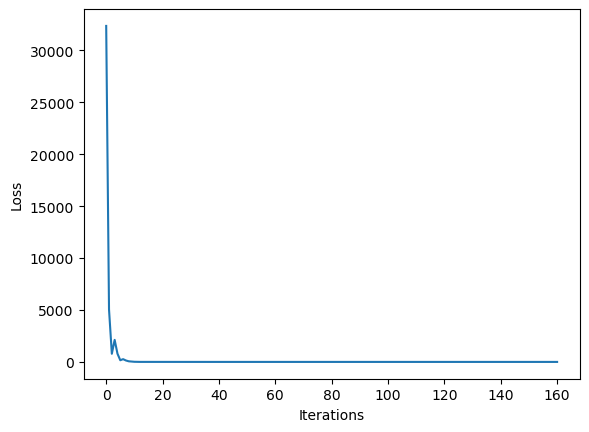

In [14]:
# TODO
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot as plt

mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP



print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")

<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**







</div>
<!-- Answer Section End -->

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **validation** score.
You should experiment with the possible parameters of the network in order to obtain a good validation score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/val score
- training time

<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
Present in a table the various parameters tested and the associated results. 
</div>
<!-- Question End -->

You can find a cell in the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

Train score pour relu:  0.5489033913484672
Test score:   0.4062794820358594
Train score pour tanh:  0.6064928926737392
Test score:   0.46486004496060007
Train score pour logistic:  0.0007902349413030363
Test score:   -0.0003558052292922387
Train score pour identity:  -9.01462647816537
Test score:   -11.262424167605419


Text(0, 0.5, 'Loss')

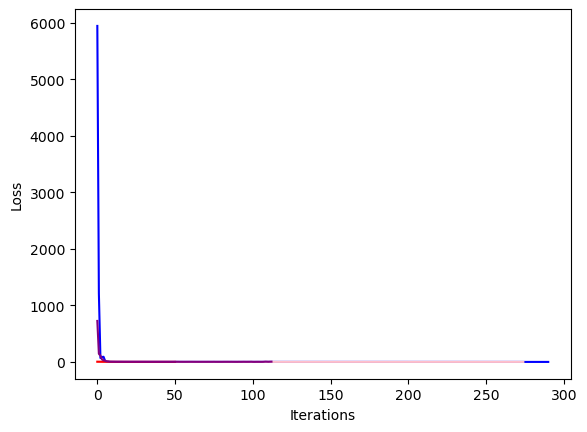

In [15]:
from matplotlib import pyplot as plt

mlp1 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (100,100,100,100), activation = 'relu', learning_rate_init = 0.0001 , learning_rate = 'adaptive', n_iter_no_change = 10) 
mlp1.fit(x_train, y_train) # train the MLP\n",
 
mlp2 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (100,)*4, activation = 'tanh', learning_rate_init = 0.0001 , learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp2.fit(x_train, y_train) # train the MLP\n",
    
mlp3 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (100,)*4, activation = 'logistic', learning_rate_init = 0.0001 ,learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp3.fit(x_train, y_train) 
   
mlp4 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (100,)*4, activation = 'identity', learning_rate_init = 0.0001 , learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp4.fit(x_train, y_train)


 
print('Train score pour relu: ', mlp1.score(x_train, y_train))
print('Test score:  ', mlp1.score(x_test, y_test))
print('Train score pour tanh: ', mlp2.score(x_train, y_train))
print('Test score:  ', mlp2.score(x_test, y_test))
print('Train score pour logistic: ', mlp3.score(x_train, y_train))
print('Test score:  ', mlp3.score(x_test, y_test))
print('Train score pour identity: ', mlp4.score(x_train, y_train))
print('Test score:  ', mlp4.score(x_test, y_test))
plt.plot(mlp1.loss_curve_, color = 'blue')
plt.plot(mlp2.loss_curve_, color = 'pink')
plt.plot(mlp3.loss_curve_, color = 'red')
plt.plot(mlp4.loss_curve_, color = 'purple')
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [16]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import numpy as np
data = []
data.append({'activation': 'relu', 'max_iter': '500', 'validation_score': 0.87})
data.append({'activation': 'tanh', 'max_iter': '200', 'early_stopping': False, 'validation_score': 0.91})

table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='validation_score', ascending=False)
table

,activation,max_iter,validation_score,early_stopping
1,tanh,200,0.91,False
0,relu,500,0.87,-


## Evaluation
<!-- Question Start -->
<div style="border: 1px solid blue; padding: 20px;border-radius: 5px;">
    
- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?
- Evaluate the score of your model on the test set that was not used for training nor for model selection.
- Train a model using your optimal parameters on the initial 15,000 data points. Evaluate the performance using the test set. What are your thoughts on the amount of data used? Do you believe the time spent is worthwhile in terms of the improvement in performance?
</div>
<!-- Question End -->

In [17]:
# TODO
import pandas as pd
import numpy as np

mlp1 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (75,75,75,75), activation = 'relu', learning_rate_init = 0.0001 , learning_rate = 'adaptive', n_iter_no_change = 10) 
mlp1.fit(x_train, y_train) # train the MLP\n",

mlp2 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (75,)*4, activation = 'tanh', learning_rate_init = 0.0001 , learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp2.fit(x_train, y_train) # train the MLP\n",
    
mlp3 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (75,)*4, activation = 'logistic', learning_rate_init = 0.0001 ,learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp3.fit(x_train, y_train) # train the MLP\n",
   
mlp4 = MLPRegressor(max_iter=3000, random_state=1 , hidden_layer_sizes= (75,)*4, activation = 'identity', learning_rate_init = 0.0001 , learning_rate= 'adaptive', n_iter_no_change = 10) 
mlp4.fit(x_train, y_train)


data = []
data.append({'activation': 'relu', 'max_iter': '3000', 'test_score': mlp1.score(x_test, y_test)})
data.append({'activation': 'tanh', 'max_iter': '3000', 'test_score': mlp2.score(x_test, y_test)})
data.append({'activation': 'logistic', 'max_iter': '3000', 'test_score': mlp3.score(x_test, y_test)})
data.append({'activation': 'identity', 'max_iter': '3000', 'test_score': mlp4.score(x_test, y_test)})
    
table = pd.DataFrame.from_dict(data)
table = table.replace(np.nan, '-')
table = table.sort_values(by='test_score', ascending=False)
table




,activation,max_iter,test_score
1,tanh,3000,0.506644
0,relu,3000,0.099715
3,identity,3000,0.049408
2,logistic,3000,-0.000747


<!-- Answer Section Start -->
<div style="border: 1px solid green; padding: 10px; margin-top: 10px; border-radius: 5px">

**Your answer here:**
    
    1) Meilleur modèle :
        Fonction d'activation : tanh
        Nombre maximal d'itérations : 3000
        Score sur le test : 0.37433
    
    
    3) L'entraînement sur 15 000 données améliore la robustesse de l'apprentissage en permettant au modèle de mieux saisir les motifs et les relations, conduisant ainsi à une meilleure performance
    
    Passer du temps à entraîner le modèle sur un ensemble de données plus vaste est susceptible de générer des améliorations potentielles de sa performance.







</div>
<!-- Answer Section End -->